## Xente Fraud Detection
Problem statement: Create a machine learning model to detect fraudulent transactions.

Predict `FraudResult` probability

Column Name	Definition
- TransactionId - Unique ÔøΩtransaction identifier on platform
- BatchId - Unique number assigned to a batch of transactions for processing
- AccountId - Unique number identifying the customer on platform
- SubscriptionId - Unique number identifying the customer subscription
- CustomerId - Unique identifier attached to Account
- CurrencyCode - Country currency
- CountryCode - Numerical geographical code of country
- ProviderId - Source provider of Item ÔøΩbought.
- ProductId - Item name being bought.
- ProductCategory - ProductIds are organized into these broader product categories.
- ChannelId - Identifies if customer used web,Android, IOS, pay later or checkout.
- Amount - Value of the transaction. Positive for debits from customer account and negative for credit into customer account
- Value - Absolute value of the amount
- TransactionStartTime - Transaction start time
- PricingStrategy - Category of Xente's pricing structure for merchants
- FraudResult - Fraud status of transaction 1 -yes or 0-No

In [271]:
# Load libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [273]:
import warnings
warnings.simplefilter("ignore")

In [274]:
#from imblearn.over_sampling import SMOTE

In [275]:
# Load datasets
df_test = pd.read_csv('../data/raw/test.csv')
df_features_train = pd.read_csv('../data/interim/features_train.csv')
df_features_test = pd.read_csv('../data/interim/features_test.csv')

In [276]:
# view data
df_test.head()

TransactionId        BatchId       AccountId       SubscriptionId  \
0  TransactionId_50600  BatchId_35028  AccountId_2441  SubscriptionId_4426   
1  TransactionId_95109  BatchId_45139  AccountId_3439  SubscriptionId_2643   
2  TransactionId_47357  BatchId_74887  AccountId_4841  SubscriptionId_3829   
3  TransactionId_28185  BatchId_11025  AccountId_2685  SubscriptionId_4626   
4  TransactionId_22140  BatchId_29804  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_2857          UGX          256  ProviderId_5   ProductId_3   
1  CustomerId_3874          UGX          256  ProviderId_5  ProductId_15   
2  CustomerId_2857          UGX          256  ProviderId_4   ProductId_6   
3  CustomerId_3105          UGX          256  ProviderId_5  ProductId_10   
4  CustomerId_3105          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId  Amount  Value  TransactionStartTime  \
0             airtime  ChannelId_3  1000.0   1000  2019-02-13T10:01:40Z   
1  financial_services  ChannelId_3  2000.0   2000  2019-02-13T10:02:12Z   
2  financial_services  ChannelId_2   -50.0     50  2019-02-13T10:02:30Z   
3             airtime  ChannelId_3  3000.0   3000  2019-02-13T10:02:38Z   
4  financial_services  ChannelId_2   -60.0     60  2019-02-13T10:02:58Z   

   PricingStrategy  
0                4  
1                2  
2                2  
3                4  
4                2

In [277]:
# view data
df_features_train.head()

PricingStrategy  ChannelId_ChannelId_2  ChannelId_ChannelId_3  \
0                2                      0                      1   
1                2                      1                      0   
2                2                      0                      1   
3                2                      0                      1   
4                2                      1                      0   

   ChannelId_ChannelId_4  ChannelId_ChannelId_5  ProductCategory_data_bundles  \
0                      0                      0                             0   
1                      0                      0                             0   
2                      0                      0                             0   
3                      0                      0                             0   
4                      0                      0                             0   

   ProductCategory_financial_services  ProductCategory_movies  \
0                                   0                       0   
1                                   1                       0   
2                                   0                       0   
3                                   0                       0   
4                                   1                       0   

   ProductCategory_other  ProductCategory_retail  ...  ProductId_ProductId_9  \
0                      0                       0  ...                      0   
1                      0                       0  ...                      0   
2                      0                       0  ...                      0   
3                      0                       0  ...                      0   
4                      0                       0  ...                      0   

   ProviderId_ProviderId_2  ProviderId_ProviderId_3  ProviderId_ProviderId_4  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        1   

   ProviderId_ProviderId_5  ProviderId_ProviderId_6  Value   Amount  \
0                        0                        1   1000   1000.0   
1                        0                        0     20    -20.0   
2                        0                        1    500    500.0   
3                        0                        0  21800  20000.0   
4                        0                        0    644   -644.0   

   FraudResult  value_log  
0          0.0   6.907755  
1          0.0   2.995732  
2          0.0   6.214608  
3          0.0   9.989665  
4          0.0   6.467699  

[5 rows x 49 columns]

In [278]:
# view data
df_features_test.head()

PricingStrategy  ChannelId_ChannelId_2  ChannelId_ChannelId_3  \
0                4                      0                      1   
1                2                      0                      1   
2                2                      1                      0   
3                4                      0                      1   
4                2                      1                      0   

   ChannelId_ChannelId_4  ChannelId_ChannelId_5  ProductCategory_data_bundles  \
0                      0                      0                             0   
1                      0                      0                             0   
2                      0                      0                             0   
3                      0                      0                             0   
4                      0                      0                             0   

   ProductCategory_financial_services  ProductCategory_movies  \
0                                   0                       0   
1                                   1                       0   
2                                   1                       0   
3                                   0                       0   
4                                   1                       0   

   ProductCategory_other  ProductCategory_retail  ...  ProductId_ProductId_9  \
0                      0                       0  ...                      0   
1                      0                       0  ...                      0   
2                      0                       0  ...                      0   
3                      0                       0  ...                      0   
4                      0                       0  ...                      0   

   ProviderId_ProviderId_2  ProviderId_ProviderId_3  ProviderId_ProviderId_4  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        1   
3                        0                        0                        0   
4                        0                        0                        1   

   ProviderId_ProviderId_5  ProviderId_ProviderId_6  Value  Amount  \
0                        1                        0   1000  1000.0   
1                        1                        0   2000  2000.0   
2                        0                        0     50   -50.0   
3                        1                        0   3000  3000.0   
4                        0                        0     60   -60.0   

   FraudResult  value_log  
0          NaN   6.907755  
1          NaN   7.600902  
2          NaN   3.912023  
3          NaN   8.006368  
4          NaN   4.094345  

[5 rows x 49 columns]

In [279]:
# dataset attribute types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
TransactionId           45019 non-null object
BatchId                 45019 non-null object
AccountId               45019 non-null object
SubscriptionId          45019 non-null object
CustomerId              45019 non-null object
CurrencyCode            45019 non-null object
CountryCode             45019 non-null int64
ProviderId              45019 non-null object
ProductId               45019 non-null object
ProductCategory         45019 non-null object
ChannelId               45019 non-null object
Amount                  45019 non-null float64
Value                   45019 non-null int64
TransactionStartTime    45019 non-null object
PricingStrategy         45019 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.2+ MB


In [300]:
from sklearn.feature_extraction.text import CountVectorizer

In [301]:
vec = CountVectorizer()

In [280]:
corr = df_features_train.corr()
print (corr['FraudResult'].sort_values(ascending=False), '\n')

FraudResult                           1.000000
Value                                 0.566739
Amount                                0.557370
value_log                             0.138169
ProductId_ProductId_15                0.093570
ProviderId_ProviderId_3               0.076205
ProductId_ProductId_9                 0.051832
ChannelId_ChannelId_3                 0.032811
ProductCategory_financial_services    0.032375
ProductCategory_transport             0.028099
ProductId_ProductId_5                 0.028099
ProductId_ProductId_13                0.022662
ProviderId_ProviderId_5               0.022490
ProductCategory_utility_bill          0.013499
ProductId_ProductId_22                0.012086
ProductId_ProductId_21                0.001774
ProductId_ProductId_23               -0.000145
ProductCategory_other                -0.000206
ProductId_ProductId_12               -0.000206
ProductId_ProductId_16               -0.000460
ProviderId_ProviderId_2              -0.000617
ProductId_Pro

The result above shows the positive and negative correlation of attributes with the 'FraudResult' attribute.

In [281]:
df_features = df_features_train.drop(columns=['ChannelId_ChannelId_4','ProductCategory_retail','ProductId_ProductId_17',
                                'ProductId_ProductId_18','ProductId_ProductId_25','ProductId_ProductId_26','FraudResult'])
                                 

In [282]:
df_features.head()

PricingStrategy  ChannelId_ChannelId_2  ChannelId_ChannelId_3  \
0                2                      0                      1   
1                2                      1                      0   
2                2                      0                      1   
3                2                      0                      1   
4                2                      1                      0   

   ChannelId_ChannelId_5  ProductCategory_data_bundles  \
0                      0                             0   
1                      0                             0   
2                      0                             0   
3                      0                             0   
4                      0                             0   

   ProductCategory_financial_services  ProductCategory_movies  \
0                                   0                       0   
1                                   1                       0   
2                                   0                       0   
3                                   0                       0   
4                                   1                       0   

   ProductCategory_other  ProductCategory_ticket  ProductCategory_transport  \
0                      0                       0                          0   
1                      0                       0                          0   
2                      0                       0                          0   
3                      0                       0                          0   
4                      0                       0                          0   

   ...  ProductId_ProductId_8  ProductId_ProductId_9  ProviderId_ProviderId_2  \
0  ...                      0                      0                        0   
1  ...                      0                      0                        0   
2  ...                      0                      0                        0   
3  ...                      0                      0                        0   
4  ...                      0                      0                        0   

   ProviderId_ProviderId_3  ProviderId_ProviderId_4  ProviderId_ProviderId_5  \
0                        0                        0                        0   
1                        0                        1                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1                        0   

   ProviderId_ProviderId_6  Value   Amount  value_log  
0                        1   1000   1000.0   6.907755  
1                        0     20    -20.0   2.995732  
2                        1    500    500.0   6.214608  
3                        0  21800  20000.0   9.989665  
4                        0    644   -644.0   6.467699  

[5 rows x 42 columns]

In [283]:
# Feature engr

In [284]:
# Function computing absolute difference from column mean
#def abs_diff(x):
 #   return np.abs(x-np.mean(x))

In [285]:
# Apply it to the amount and store to new column
#df_features['diff'] = abs_diff(df_features['Amount'])

In [286]:
df_features.drop(columns=['Amount'], inplace=True)

#### Split-out Training and Validation dataset

In [287]:
X = df_features.values
y = df_features_train['FraudResult']
test_size = 0.20
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [288]:
#smote_algo = SMOTE(random_state=0)
#smote_data_X, smote_data_Y = smote_algo.fit_sample(X_train, y_train)
#smote_data_X = pd.DataFrame(data=smote_data_X, columns=df_features.columns)
#smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=["FraudResult"])

#smote_data = smote_data_X
#smote_data["FraudResult"] = smote_data_Y["FraudResult"]

In [289]:
#sm = SMOTE(random_state=0)
#x_train_new, y_train_new = sm.fit_sample(X_train, y_train)

#### Evaluate Algorithms: Baseline

In [290]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'accuracy'

In [291]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
#models.append(( 'SVM' , SVC()))
models.append(( 'RF' , RandomForestClassifier()))

The algorithms all use default tuning parameters. To be displayed are the mean and standard deviation of accuracy for each algorithm as it is calculated, the results will be collected for later use.

In [292]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998275 (0.000572)
LDA: 0.998184 (0.000577)
KNN: 0.999412 (0.000213)
CART: 0.999347 (0.000331)
NB: 0.996851 (0.000893)
RF: 0.999412 (0.000276)


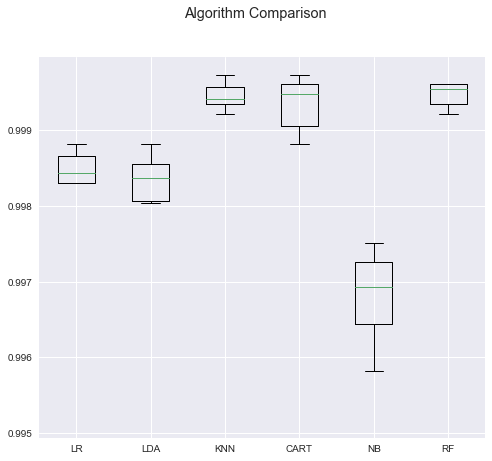

In [293]:
# Compare Algorithms
fig = plt.figure(figsize=(8,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [294]:
# Make predictions on validation dataset 6,
alg = RandomForestClassifier(random_state=6)
alg.fit(X_train, y_train)
predictions = alg.predict(X_test)
print('accuracy_score')
print(accuracy_score(y_test, predictions))
print(' ')
print('confusion_matrix')
print(confusion_matrix(y_test, predictions))
print(' ')
print('classification_report')
print(classification_report(y_test, predictions))

accuracy_score
0.999895468562
 
confusion_matrix
[[19097     0]
 [    2    34]]
 
classification_report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19097
         1.0       1.00      0.94      0.97        36

   micro avg       1.00      1.00      1.00     19133
   macro avg       1.00      0.97      0.99     19133
weighted avg       1.00      1.00      1.00     19133



In [295]:
# Find the best value for max_depth among values 2, 5 and 10#
#grid_search = GridSearchCV(
#  RandomForestClassifier(random_state=6), param_grid={'max_depth': [2, 5, 10,30]})
#best_value = grid_search.fit(
#  X_train, y_train).best_params_['max_depth']


In [296]:
# Using the best value from above, fit a random forest
#clf = RandomForestClassifier(
#  random_state=6, max_depth=best_value).fit(X_train, y_train)

In [297]:
# Apply SelectKBest with chi2 and pick top 100 features
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#vt = SelectKBest(chi2, k=41).fit(X_train, y_train)

In [298]:
# Create a new dataset only containing the selected features
#X_train_reduced = vt.transform(X_train)

In [299]:
#X_train_reduced[1]

In [122]:
# Make predictions on validation dataset
predictions = clf.predict(X_test)
print('accuracy_score')
print(accuracy_score(y_test, predictions))
print(' ')
print('confusion_matrix')
print(confusion_matrix(y_test, predictions))
print(' ')
print('classification_report')
print(classification_report(y_test, predictions))

accuracy_score
0.999843202843
 
confusion_matrix
[[19097     0]
 [    3    33]]
 
classification_report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19097
         1.0       1.00      0.92      0.96        36

   micro avg       1.00      1.00      1.00     19133
   macro avg       1.00      0.96      0.98     19133
weighted avg       1.00      1.00      1.00     19133



In [123]:
# Use model to make predictions on new data

In [238]:
# get Ids
df_submission = df_test[['TransactionId']]

In [239]:
df_features_test = df_features_test.drop(columns=['ChannelId_ChannelId_4','ProductCategory_retail','ProductId_ProductId_17',
                                'ProductId_ProductId_18','ProductId_ProductId_25','ProductId_ProductId_26','FraudResult'])
                                 

In [240]:
# Make predictions on new dataset
predictions = alg.predict(df_features_test.values)

In [241]:
df_submission['FraudResult'] = predictions

In [242]:
#df_submission['FraudResult'] = df_submission.FraudResult.apply(lambda x: int(x))

In [243]:
df_submission.to_csv('../data/interim/submission.csv',index=False)

<b>NOTES<b>

exprimenting with random_state of randomforest had a major effect on the f1-score value